In [301]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [310]:
# Import Data
data = pd.read_csv('Play_Store_Data.csv')
# data.head()


In [303]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [304]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [305]:
# Find the number of missing data in each row
data.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [306]:
list(data.columns)


['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

### DATA CLEANING STEP


In [311]:
# STEP 1:

print(data['Reviews'].dtype)

reviews = [i for i in data['Reviews']]
def clean_reviews(reviews_list):
    '''
        We have Reviews record with 'M' as million views
        making it object data type
        will be converting it to numeric data
    '''
    cleaned_data = []
    for review in reviews_list:
        if 'M' in review:
            # print(review)
            review = review.replace('M','')
            # print(review)
            review = float(review)*1000000 #1M = 10,00,000
            # print(review)
        cleaned_data.append(review)
    return cleaned_data
data['Reviews'] = clean_reviews(reviews)
# check the data type
# data['Reviews'].dtype
# we will be changing to float
data['Reviews'] = data['Reviews'].astype(float)
# data['Reviews'].dtype


object


In [312]:
# STEP 2:
# Similar is the case with Size need to convert it to float from object

# there is a data with  1,000+ size we will drop it by finding its index 
# Reason: uncertain if its MB or KB
index =  data[data['Size'] == '1,000+'].index
data.drop(axis = 0, inplace=True, index = index)

sizes = [i for i in data['Size']]


def clean_sizes(sizes_list):
    '''
        as there are M and K we will remove M str
        and convert k(kilobytes) to MB by dividing by 1024

    '''
    cleaned_data = []
    for size in sizes_list:
        if 'M' in size:
            size = size.replace('M', '')
            size = float(size)
        elif 'k' in size:
            size = size.replace('k', '')
            size = float(size)
            size = size/1024  # 1 megabyte = 1024 kilobytes

        # another val encountered was "Varies with device"
        # this is replaced with 0    
        # representing 'Varies with device' with value 0
        elif 'Varies with device' in size:
            size = float(0)
        cleaned_data.append(size)
    return cleaned_data


data['Size'] = clean_sizes(sizes)
# data['Size'].dtype
data['Size'] = data['Size'].astype(float)
# data['Size'].dtype

In [313]:
# STEP 3:
# Similar is the case with Intalls need to convert it to int from object

installs = [i for i in data['Installs']]

def clean_installs(installs_list):
    # 3 conditions remove the comma, + and convert Free to 0
    clean_installs = []
    for install in installs_list:
        if ',' in install:
            install = install.replace(',','')
        if '+' in install:
            install = install.replace('+','')
        if 'Free' in install:
            install = install.replace('Free', 0)
        install = int(install)
        clean_installs.append(install)
    return clean_installs


data['Installs'] = clean_installs(installs)
data['Installs'] = data['Installs'].astype(float)
# data['Installs'].dtype


In [314]:
# STEP 4:
# Similar is the case with Price need to convert it to float from object

prices = [i for i in data['Price']]

def cleaned_prices(price_list):
    cleaned_data = []
    for price in price_list:
        if '$' in price:
            price = price.replace('$','')
        if 'Everyone' in price:
            price = price.replace('Everyone',0)
        cleaned_data.append(price)
    return cleaned_data

data['Price'] = cleaned_prices(prices)
data['Price'] = data['Price'].astype(float)
# data['Price'].dtype


In [315]:
# Verify the missing data in the dataset
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [316]:
# Cross verify if the data type is changed to float from object
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.2+ MB


In [ ]:
# replcing with medians
def replace_vals(missing_vals):

    return missing_vals.fillna(missing_vals.median())

data['Rating'] = data['Rating'].transform(replace_vals)
data['Rating'] = data['Rating'].astype(float)

# remove the record where 'Type' is having null value
index = data[data['Type'].isna()].index
data.drop(axis=0, inplace=True, index=index)


In [318]:
print(data['Current Ver'].mode())
print(data['Android Ver'].mode().values[0])


data['Current Ver'].fillna(data['Current Ver'].mode().values[0], inplace = True)
data['Android Ver'].fillna(data['Android Ver'].mode().values[0], inplace = True)


# Check if there is any missing data left 
data.isna().sum()



0    Varies with device
dtype: object
4.1 and up


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#### QnA


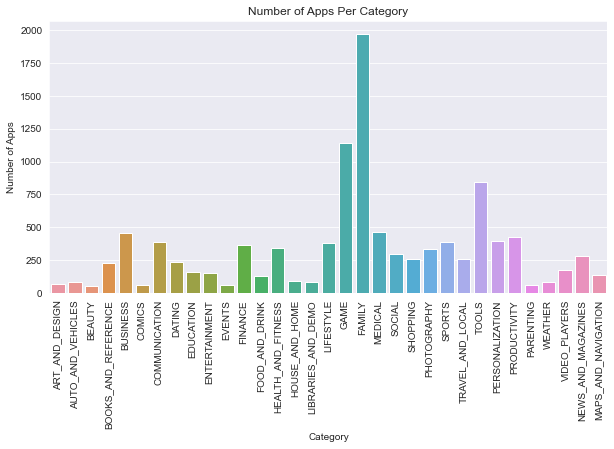

In [250]:
# 1.Number of apps in each category 

sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=data)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()


This graphs show that the categories that have most apps are the
'Family', 'Game' and also 'Tools.
Categories with fewer apps are the Beauty, Comics,Events and Parenting


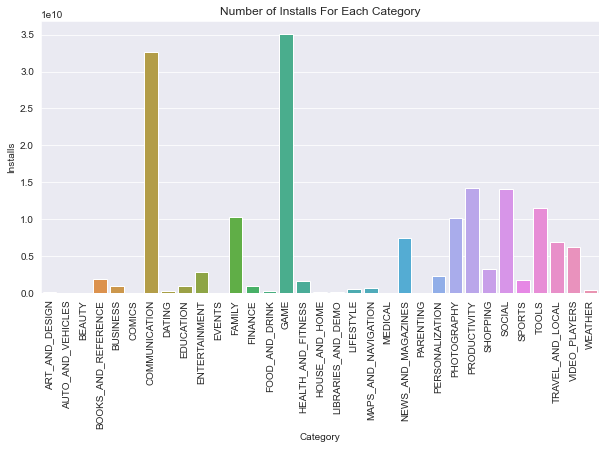

In [251]:
# 2. Find category that is used the most based on number of installs

categories = data.groupby('Category')
category_installs_sum_df = categories[['Installs']].sum()
category_installs_sum_df = category_installs_sum_df.reset_index()  

plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Installs', data=category_installs_sum_df)
plt.xticks(rotation=90)
plt.ylabel('Installs')
plt.title('Number of Installs For Each Category')
plt.show()


Game and Communications category has the maxm installs
From this distribution plotting of number of installs for each category, we can see that most of the apps
being downloaded and installed are from the categories of 'Game' and 'Communication'.

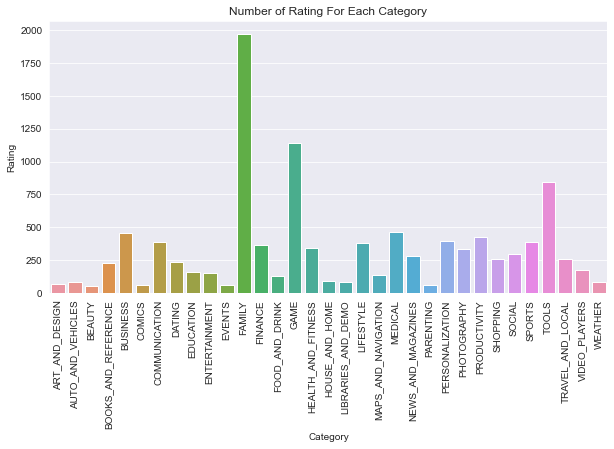

In [252]:
#3. Find the catgory with most ratings
categories = data.groupby('Category')
category_rating_sum_df = categories[['Rating']].count()
category_rating_sum_df = category_rating_sum_df.reset_index()  # to convert groupby object into dataframe

plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Rating', data=category_rating_sum_df)
plt.xticks(rotation=90)
plt.ylabel('Rating')
plt.title('Rating For Each Category')
plt.show()



Here we can conclude is that even though Game and Communication have major installs 
most ratings are given to the Family and Game Category

d:\Almabetter\EDA\alma_venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


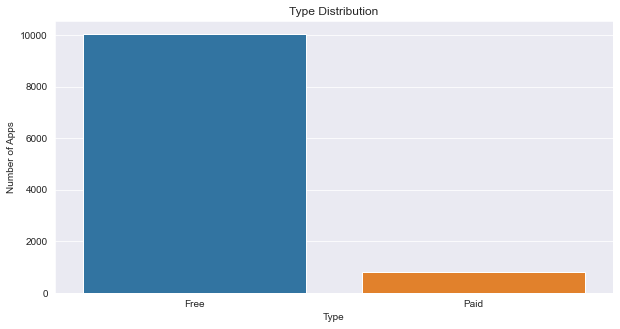

In [254]:
#4. paid vs free apps distribution

plt.figure(figsize=(10, 5))
sns.countplot(data['Type'])
plt.title('Type Distribution')
plt.ylabel('Number of Apps')
plt.show()


From the plot we can imply that majority of the apps in the Play Store are Free apps.


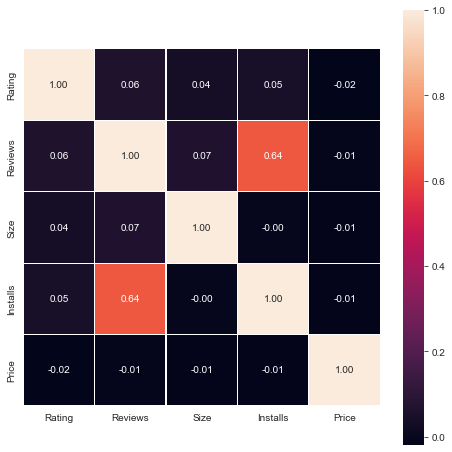

In [256]:
# 5.Correlation between no. of review, ratings, size, price and no. of installs
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(data.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()


In [258]:
# Read the User Reviews Data
data_reviews = pd.read_csv('User_Reviews.csv')
# data_reviews.sample(5)

In [259]:
data_reviews.shape

(64295, 5)

In [260]:
data_reviews.isnull().sum()
# Since the missing vals are near to 26k we will fill the missing vals
# as removing or droping them will cause imbalnce in the analysis

# Since it is advisable to drop the column having missing data about 50%.
# here we have aroun 41.7% data missing we will drop the rows instead of the entire column

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [261]:
# Data Cleaning on the new user review dataset
data_reviews = data_reviews.dropna()
data_reviews.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [295]:
## Merge the two datasets based on App
merged_df = data_reviews.merge(data, on = "App")
merged_df.drop(['Rating','Reviews','Size','Installs', 'Type','Price','Content Rating',	'Genres','Last Updated','Current Ver','Android Ver'], axis = 1, inplace=True)
merged_df.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.533333,HEALTH_AND_FITNESS
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.533333,HEALTH_AND_FITNESS
2,10 Best Foods for You,Good.!!,Positive,1.0,0.600000,HEALTH_AND_FITNESS
3,10 Best Foods for You,Good.!!,Positive,1.0,0.600000,HEALTH_AND_FITNESS
4,10 Best Foods for You,Thanks advice. Downloaded Adobe reader still c...,Positive,0.2,0.200000,HEALTH_AND_FITNESS


d:\Almabetter\EDA\alma_venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


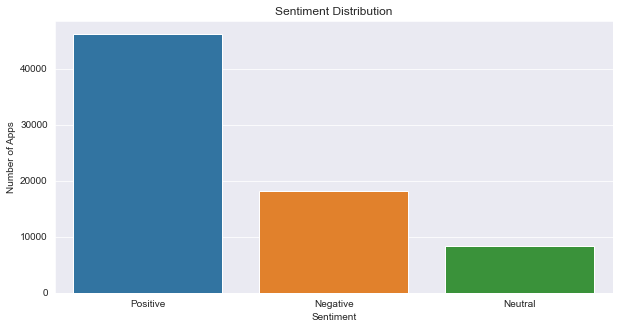

In [320]:
# After mapping both the datasets
# 6. Plot the Sentiments of apps
plt.figure(figsize=(10, 5))
sns.countplot(merged_df['Sentiment'])
plt.title('Sentiment Distribution')
plt.ylabel('Number of Apps')
plt.show()

In [269]:
# Verify the merge with app and its catgory
# merged_df[(merged_df['App'] == 'Cool Reader')  ]
merged_df[merged_df['Category'] == 'HEALTH_AND_FITNESS']

# Verify the merge with app and its catgory
data_reviews = data_reviews.sort_values(by = 'App')
data_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
130,10 Best Foods for You,Good.!!,Positive,1.00,0.600000
131,10 Best Foods for You,Thanks advice. Downloaded Adobe reader still c...,Positive,0.20,0.200000
132,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.50,0.500000
133,10 Best Foods for You,Absolutely Fabulous Phenomenal,Positive,0.45,0.750000


The Analysis from both the data files suggest that the listed apps are Good
for the users to use. Family and Gaming category was where the major count of 
applications were found, based on installations the Gaming category took the first place.
Further the analysis of ratings given by the user shows the same.

The analysis also shows that the number of free applications are more than the
paid version applications. Most apps showed a positive sentiment for usage review. 


In [ ]:
# To show the last/Latest Update of each category
last_updated = data[['Category', 'Last Updated']].groupby(['Category']).agg(['max'])
print(last_updated)
